In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from utils_all import *
%matplotlib inline


/Users/jetbrains/miniconda3/envs/py35/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)
/Users/jetbrains/miniconda3/envs/py35/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


http://stackoverflow.com/questions/2369492/generate-a-heatmap-in-matplotlib-using-a-scatter-data-set

In [93]:
%store -r df_1_final

In [94]:
data = df_1_final

In [95]:
data_cl = clean_df(data)

In [96]:
num_features = ['x_coords','y_coords']

data_cl = data_cl.dropna(axis=0)
data_num = data_cl[num_features]
data_num = data_num[data_num.applymap(lambda x: isinstance(x, (int, float)))]
data_cl[num_features] = data_num
data_cl = data_cl.dropna(axis=0)

In [97]:
data_xy = data_cl[['meta_name','x_coords','y_coords']]

In [98]:
from matplotlib.pyplot import hist2d, xlim, ylim

In [99]:
smpl.head()

,meta_name,x_coords,y_coords
40707,startDate,506,1322
126643,name,73,3064
23255,name,20,401
149297,startDate,90,806
68459,startDate,20,355


In [101]:
import matplotlib.ticker as ticker

In [102]:
def draw_hex(meta_name, df, ylim=(960,0), xlim=(0,1000)):
    dataXY = df[df.meta_name == meta_name]
    try:
        smpl = dataXY.sample(1000)
    except Exception as e:
        smpl = dataXY
    g = sns.jointplot(x=smpl.x_coords, y=smpl.y_coords, kind='scatter', ylim=ylim, xlim=xlim)

    g.ax_joint.xaxis.set_major_locator(ticker.MultipleLocator(100))
    g.ax_joint.yaxis.set_major_locator(ticker.MultipleLocator(100))

    plt.show()

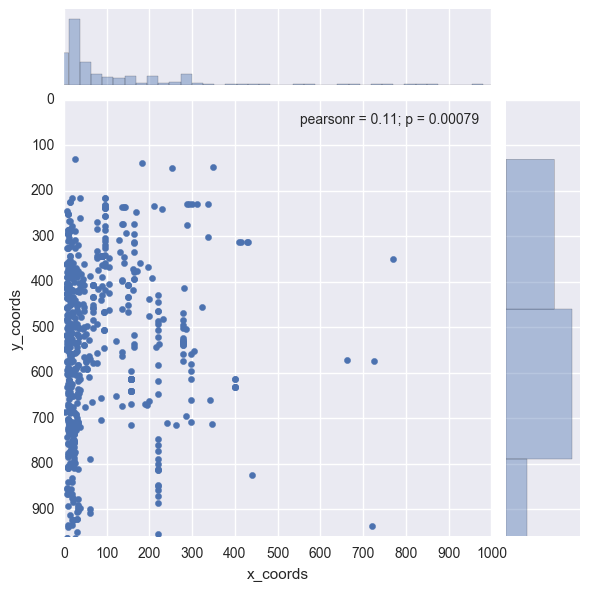

In [103]:
draw_hex('location', data_xy)

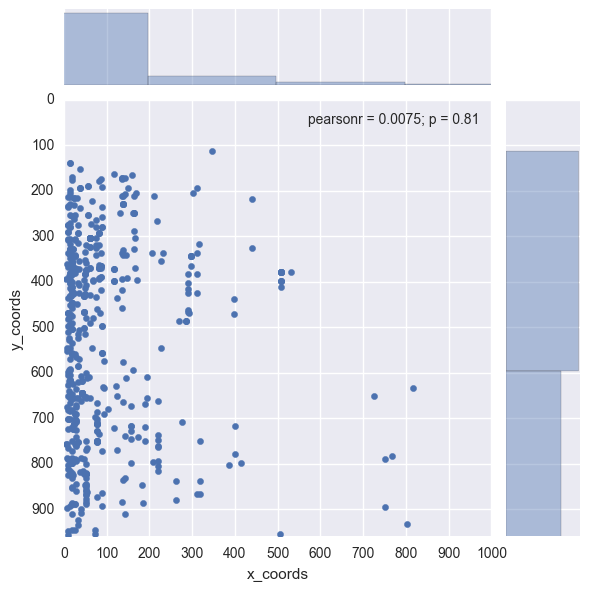

In [104]:
draw_hex('startDate', data_xy)

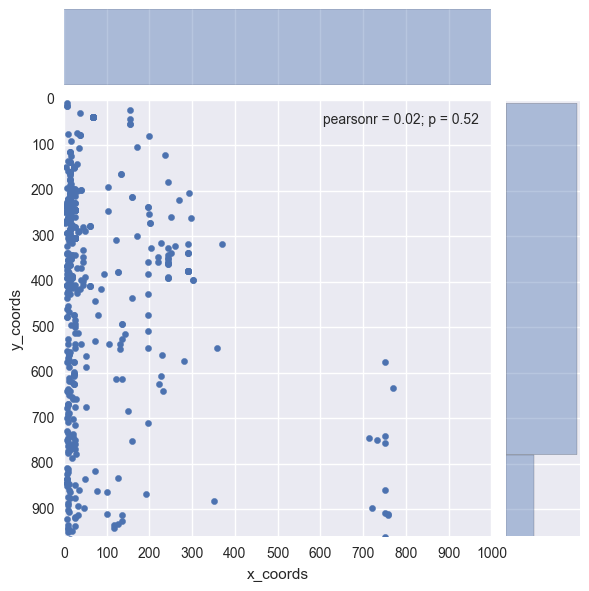

In [105]:
draw_hex('name', data_xy)

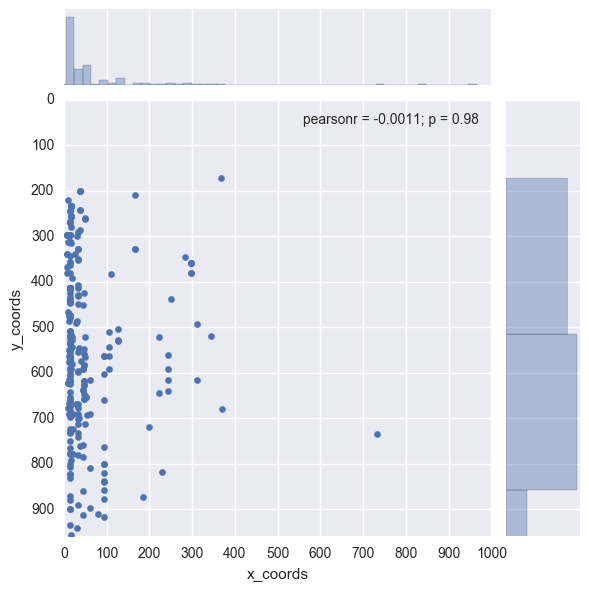

In [106]:
draw_hex('description', data_xy)

## The center of rectangule

In [107]:
data_rect = data_cl[['meta_name','x_coords','y_coords', 'block_height', 'block_width']]

In [108]:
data_rect['x1'] = data_rect.x_coords
data_rect['y1'] = data_rect.y_coords

In [109]:
data_rect['x2'] = data_rect.x_coords + data_rect.block_width
data_rect['y2'] = data_rect['y1']

In [110]:
data_rect['x3'] = data_rect['x1']
data_rect['y3'] = data_rect['y1'] + data_rect.block_height

In [111]:
data_rect['x4'] = data_rect['x3'] + data_rect.block_width
data_rect['y4'] = data_rect['y3']

In [112]:
data_block_centers = pd.DataFrame()
data_block_centers['x_coords'] = data_rect.x1 + (data_rect.x2 - data_rect.x1)/2
data_block_centers['y_coords'] = data_rect.y1 + (data_rect.y3 - data_rect.y1)/2
data_block_centers['meta_name'] = data_rect.meta_name

Dataframe with the centers of corresponding blocks

If the average web page size is 960 pixels and the average screen width is 1024 pixel
https://www.iteracy.com/blog/post/size-and-layout-of-a-web-page

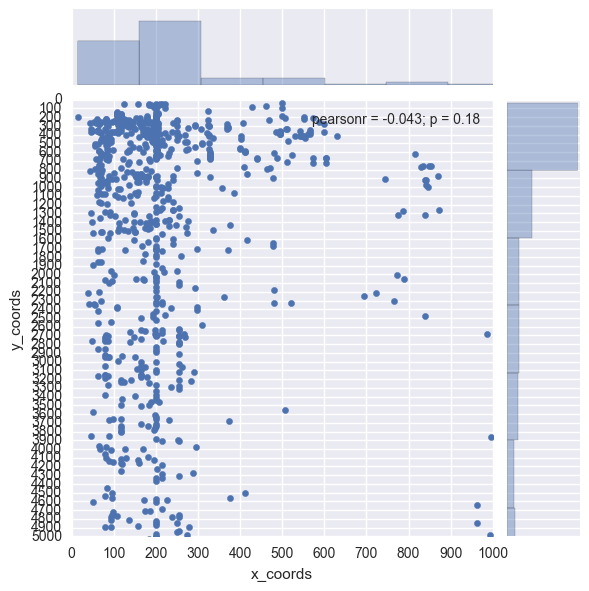

In [113]:
draw_hex('name', data_block_centers, ylim=(5000,0))

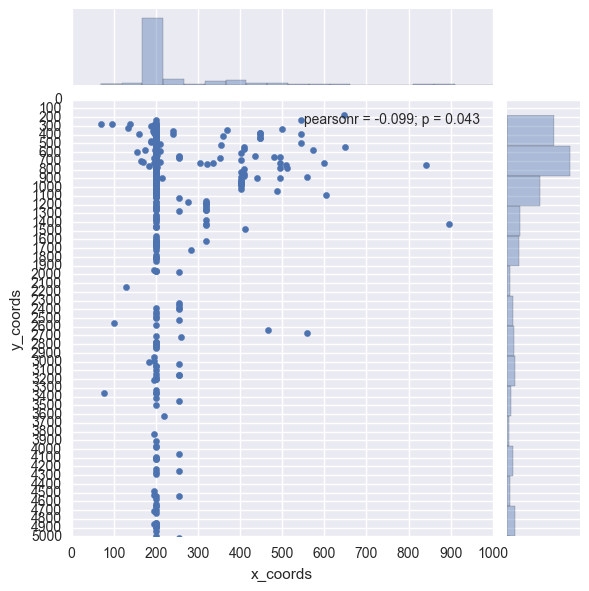

In [114]:
draw_hex('description', data_block_centers, ylim=(5000,0))

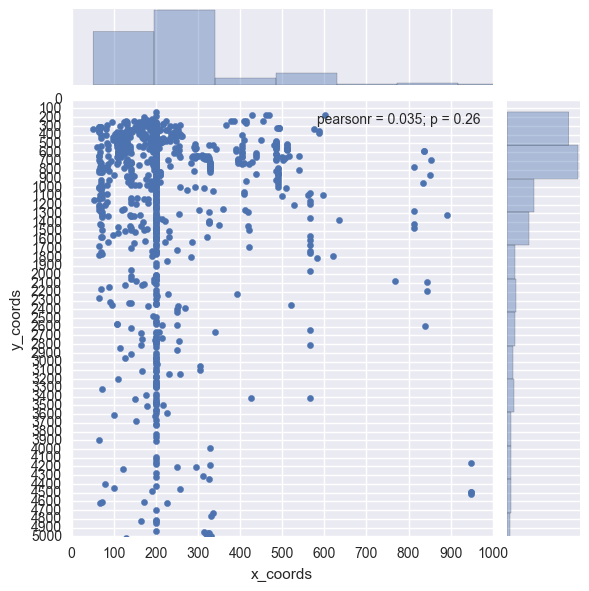

In [115]:
draw_hex('location', data_block_centers,  ylim=(5000,0))

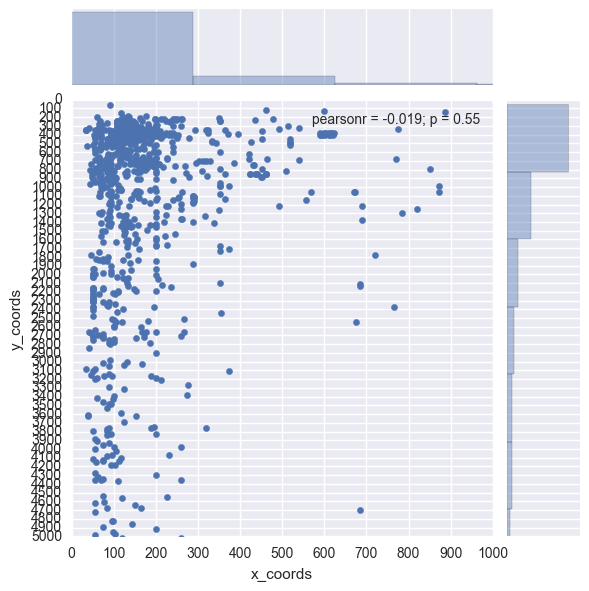

In [116]:
draw_hex('startDate', data_block_centers,  ylim=(5000,0))

In [156]:
data_block_centers.columns = ['x_center', 'y_center', 'meta_name']

In [157]:
xy_data = pd.concat(axis=1, objs=
          [
            data_cl[['x_coords','y_coords', 'block_height', 'block_width']],
            data_block_centers
          ])

meta_name
description    [[Axes(0.125,0.684722;0.336957x0.215278), Axes...
location       [[Axes(0.125,0.684722;0.336957x0.215278), Axes...
name           [[Axes(0.125,0.684722;0.336957x0.215278), Axes...
startDate      [[Axes(0.125,0.684722;0.336957x0.215278), Axes...
dtype: object

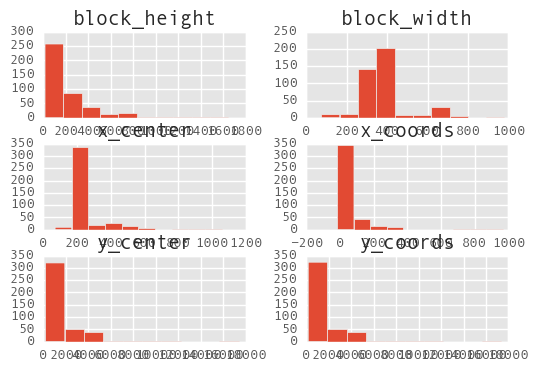

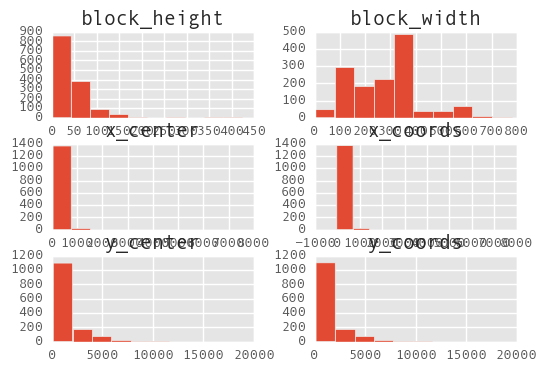

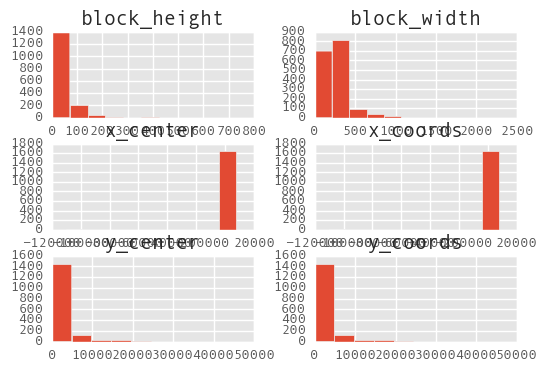

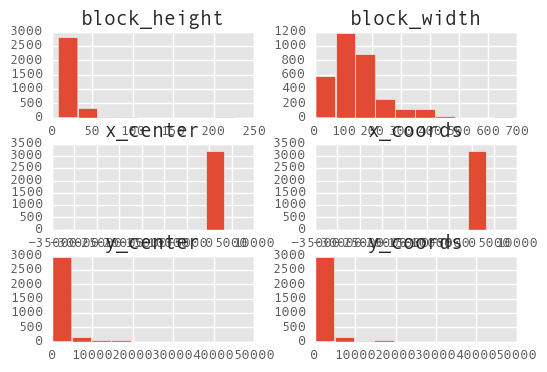

In [160]:
xy_data.groupby('meta_name').hist()


meta_name
description    Axes(0.125,0.125;0.775x0.775)
location       Axes(0.125,0.125;0.775x0.775)
name           Axes(0.125,0.125;0.775x0.775)
startDate      Axes(0.125,0.125;0.775x0.775)
Name: block_width, dtype: object

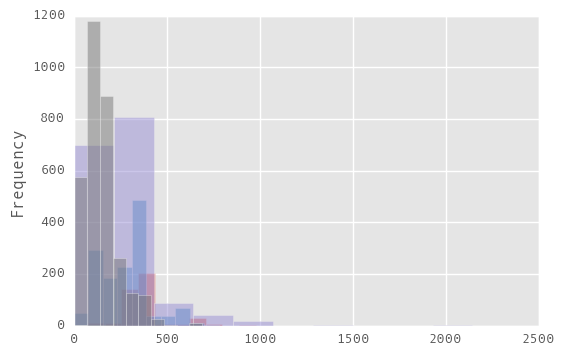

In [166]:
xy_data.groupby('meta_name').block_width.plot(kind='hist', alpha=0.5)

meta_name
description    Axes(0.125,0.125;0.775x0.775)
location       Axes(0.125,0.125;0.775x0.775)
name           Axes(0.125,0.125;0.775x0.775)
startDate      Axes(0.125,0.125;0.775x0.775)
Name: block_height, dtype: object

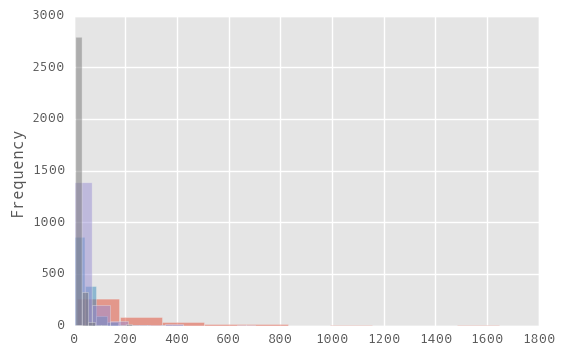

In [167]:
xy_data.groupby('meta_name').block_height.plot(kind='hist', alpha=0.5)

meta_name
description    Axes(0.125,0.125;0.775x0.775)
location       Axes(0.125,0.125;0.775x0.775)
name           Axes(0.125,0.125;0.775x0.775)
startDate      Axes(0.125,0.125;0.775x0.775)
Name: x_center, dtype: object

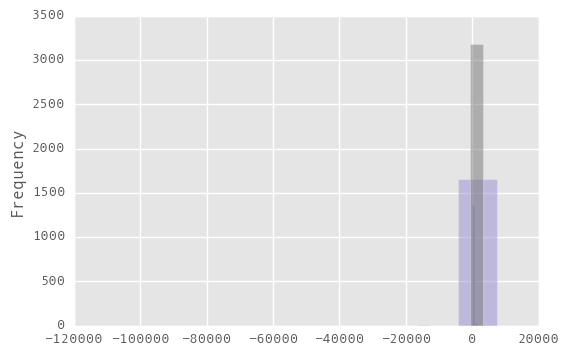

In [169]:
xy_data.groupby('meta_name').x_center.plot(kind='hist', alpha=0.5)

meta_name
description    Axes(0.125,0.125;0.775x0.775)
location       Axes(0.125,0.125;0.775x0.775)
name           Axes(0.125,0.125;0.775x0.775)
startDate      Axes(0.125,0.125;0.775x0.775)
Name: y_center, dtype: object

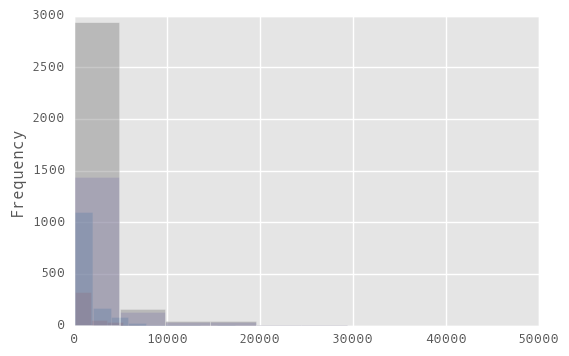

In [171]:
xy_data.groupby('meta_name').y_center.plot(kind='hist', alpha=0.4)

meta_name
description    Axes(0.125,0.125;0.775x0.775)
location       Axes(0.125,0.125;0.775x0.775)
name           Axes(0.125,0.125;0.775x0.775)
startDate      Axes(0.125,0.125;0.775x0.775)
Name: x_coords, dtype: object

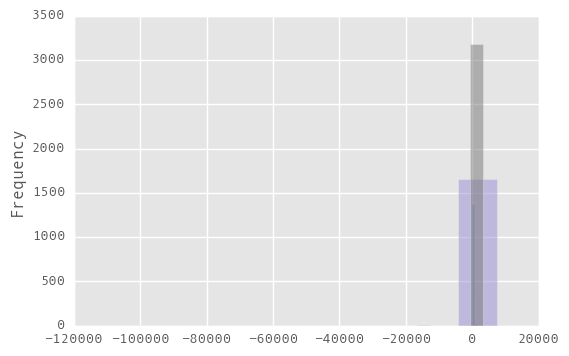

In [172]:
xy_data.groupby('meta_name').x_coords.plot(kind='hist', alpha=0.5)

meta_name
description    Axes(0.125,0.125;0.775x0.775)
location       Axes(0.125,0.125;0.775x0.775)
name           Axes(0.125,0.125;0.775x0.775)
startDate      Axes(0.125,0.125;0.775x0.775)
Name: y_coords, dtype: object

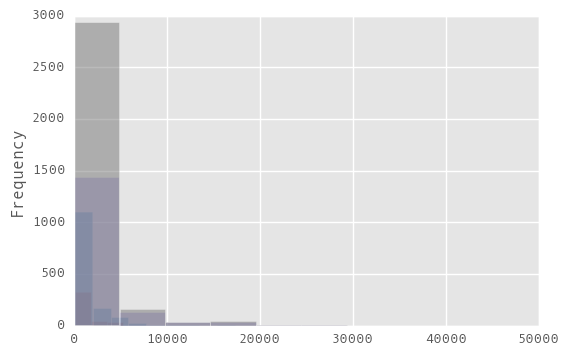

In [173]:
xy_data.groupby('meta_name').y_coords.plot(kind='hist', alpha=0.5)

In [131]:
xy_data.groupby('meta_name').describe()

block_height  block_width       x_coords       x_coords  \
meta_name                                                                    
description count    417.000000   417.000000     417.000000     417.000000   
            mean     206.923261   374.381295      54.839329     242.029976   
            std      229.658262   118.393538      95.028136     108.793082   
            min       14.000000    75.000000     -15.000000      69.000000   
            25%       60.000000   310.000000      15.000000     200.000000   
            50%      132.000000   370.000000      16.000000     200.000000   
            75%      260.000000   372.000000      50.000000     200.000000   
            max     1645.000000   980.000000     965.000000    1057.500000   
location    count   1391.000000  1391.000000    1391.000000    1391.000000   
            mean      46.358016   282.509705     103.421280     244.676132   
            std       45.852812   137.837198     247.077553     248.606400   
            min        1.000000     1.000000     -15.000000      45.500000   
            25%       18.000000   158.000000      17.000000     160.250000   
            50%       34.000000   300.000000      32.000000     200.000000   
            75%       57.000000   360.000000     132.000000     251.500000   
            max      423.000000   780.000000    7237.000000    7277.500000   
name        count   1655.000000  1655.000000    1655.000000    1655.000000   
            mean      47.244713   268.574622      10.944411     145.231722   
            std       56.360591   173.604361    2833.678329    2838.601008   
            min        1.000000     1.000000 -109989.000000 -109988.500000   
            25%       19.000000   142.000000      15.000000     117.000000   
            50%       30.000000   241.000000      26.000000     200.000000   
            75%       55.000000   350.000000      94.000000     230.250000   
            max      703.000000  2143.000000    7326.000000    7340.500000   
startDate   count   3187.000000  3187.000000    3187.000000    3187.000000   
            mean      23.280515   147.313461      86.746470     160.403201   
            std       18.098923    91.718615     750.690115     751.826040   
            min        8.000000     4.000000  -32691.000000  -32670.500000   
            25%       16.000000    80.000000      20.000000      89.000000   
            50%       19.000000   131.000000      50.000000     131.000000   
            75%       23.000000   186.000000     126.500000     200.000000   
            max      250.000000   690.000000    7223.000000    7277.500000   

                       y_coords      y_coords  
meta_name                                      
description count    417.000000    417.000000  
            mean    1405.016787   1508.478417  
            std     1675.048759   1661.879520  
            min      173.000000    180.500000  
            25%      475.000000    564.000000  
            50%      691.000000    857.000000  
            75%     1656.000000   1690.000000  
            max    17318.000000  17380.500000  
location    count   1391.000000   1391.000000  
            mean    1476.092739   1499.271747  
            std     1795.331671   1793.326460  
            min      130.000000    140.000000  
            25%      493.000000    515.750000  
            50%      751.000000    780.000000  
            75%     1575.500000   1621.750000  
            max    19233.000000  19253.500000  
name        count   1655.000000   1655.000000  
            mean    2548.906949   2572.529305  
            std     3942.332866   3944.179075  
            min        0.000000     37.500000  
            25%      364.000000    392.000000  
            50%     1008.000000   1026.000000  
            75%     3201.000000   3216.000000  
            max    48861.000000  48887.000000  
startDate   count   3187.000000   3187.000000  
            mean    1881.051773   1892.692030  
            std     30

In [179]:
df_1_final[['url','meta_name','x_coords','y_coords', 'block_height', 'block_width']].values[:100,:]

array([[ 'http://www.livenation.com/events/155446-oct-26-2012-frontier-ruckus-water-liars',
        'startDate', 51, 481, 22, 75],
       ['http://www.livenation.com/events/213114-jan-31-2013-corey-smith',
        'startDate', 51, 717, 22, 86],
       [ 'http://www.livenation.com/events/373699-oct-24-2014-rodrigo-y-gabriela-9-dead-alive-tour',
        'startDate', 51, 862, 22, 83],
       [ 'http://mysunshinecoast.com.au/events/events-display/deepblue-winter-workshops,51831,71287',
        'name', 69, 38, 55, 193],
       [ 'http://mysunshinecoast.com.au/events/events-display/deepblue-winter-workshops,51831,71287',
        'startDate', 126, 399, 21, 207],
       [ 'http://mysunshinecoast.com.au/events/events-display/deepblue-winter-workshops,51831,71287',
        'location', 69, 467, 55, 274],
       [ 'http://mysunshinecoast.com.au/events/events-display/headspace-meditation-for-study-success,45274,63229',
        'name', 69, 38, 55, 295],
       [ 'http://mysunshinecoast.com.au/events